In [1]:
import pandas as pd


In [2]:
# read csv but remove first column - shift/tab/tab in () to see all parameters
data=pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)

In [5]:
data.head()


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [9]:
data.shape

(200, 4)

In [6]:
import seaborn as sns

In [7]:
#magic to show plots inline
%matplotlib inline  

KeyError: 'Sales'

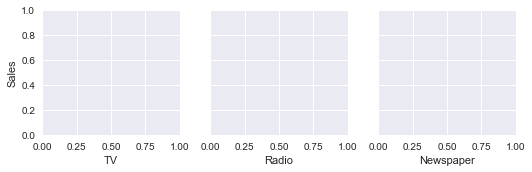

In [8]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

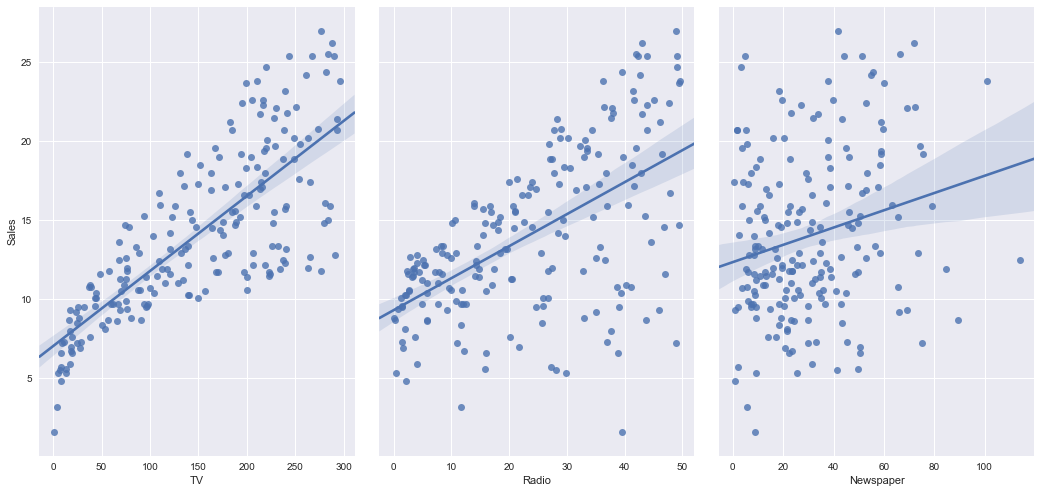

In [13]:
#adding size,aspect and kind
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=7,aspect=0.7,kind='reg')

In [15]:
#create python list of feature names
feature_cols=['TV','Radio','Newspaper']
#take a subset of a data
X=data[feature_cols]


# alternatively
X=data[['TV','Radio','Newspaper']]

In [18]:
print (type(X))
print (X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [20]:
y=data['Sales']

#alternatively
y=data.Sales

In [21]:
print( type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


###  desc
## desc2














In [26]:
#Splitting X and y into test and train data(default 25% for test)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [31]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate the model
linReg=LinearRegression()

# train the model
linReg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
print(linReg.intercept_)
print(linReg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [ ]:
#Liniar model is highly interpretable
#interpretation
# for a unit increase in TV expect 0.046 increase in unit sales


In [55]:
#PREDICTIONS
y_pred=linReg.predict(X_test)

In [57]:
y_pred

array([ 21.70910292,  16.41055243,   7.60955058,  17.80769552,
        18.6146359 ,  23.83573998,  16.32488681,  13.43225536,
         9.17173403,  17.333853  ,  14.44479482,   9.83511973,
        17.18797614,  16.73086831,  15.05529391,  15.61434433,
        12.42541574,  17.17716376,  11.08827566,  18.00537501,
         9.28438889,  12.98458458,   8.79950614,  10.42382499,
        11.3846456 ,  14.98082512,   9.78853268,  19.39643187,
        18.18099936,  17.12807566,  21.54670213,  14.69809481,
        16.24641438,  12.32114579,  19.92422501,  15.32498602,
        13.88726522,  10.03162255,  20.93105915,   7.44936831,
         3.64695761,   7.22020178,   5.9962782 ,  18.43381853,
         8.39408045,  14.08371047,  15.02195699,  20.35836418,
        20.57036347,  19.60636679])

In [53]:
#EVALUATION
#1. MAE - Mean Absolute Error - mean(yTrue-yPred)
#2. MSE - Mean Square Error - (yTrue-yPred)**2 - popular, punishes larger errors
#3. RSME - Root Square Mean Error - sqrt(MSE) - increases the weight of larger errors, interpretatable in Y units

In [60]:
import numpy as np
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test,y_pred)) 

1.4046514230328953

In [61]:
# Test how removing one predictor changes RSME from 1.4 to 1.38 - new model is little better
# 
X=data[['TV','Radio']]
y=data.Sales
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
linReg.fit(X_train,y_train)
y_pred=linReg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,y_pred)) 

1.3879034699382886

In [ ]:
# R calculates also p-values, R2,  adjustedR2